In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import librosa
import numpy as np
import pandas as pd
import librosa.display
import keras
import IPython.display as ipd
import numpy as np
from tqdm import tqdm

In [ ]:
meta = pd.read_csv(r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\blnc_meta\balnc.csv")

In [ ]:
p = r"C:\Users\hpmsi\OneDrive\Documents\Project_Ulster\balanced\fold1\do002.wav"

In [ ]:
x,sr = librosa.load(p)

In [ ]:
sr

In [ ]:
meta['class'].value_counts()

In [ ]:
audio_dataset_path=(r'C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\balanced')
metadata=pd.read_csv(r'C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\blnc_meta\balnc.csv')
metadata.head()

In [36]:
file_name = r"C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\balanced\fold2\do434.wav"

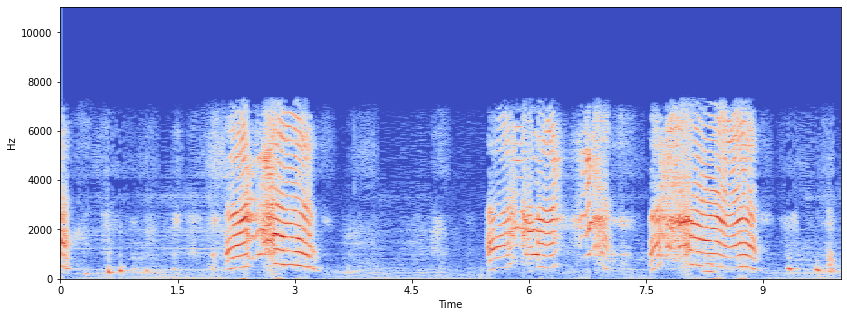

In [39]:
    x, sr = librosa.load(file_name, res_type='kaiser_fast') 
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    fig = plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

(20, 431)


C:\Users\hpmsi\AppData\Local\Temp\ipykernel_16224\164628595.py:1: FutureWarning: Pass y=[-0.15617436 -0.18445279 -0.11844472 ...  0.00300277  0.00585954
  0.00451756] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


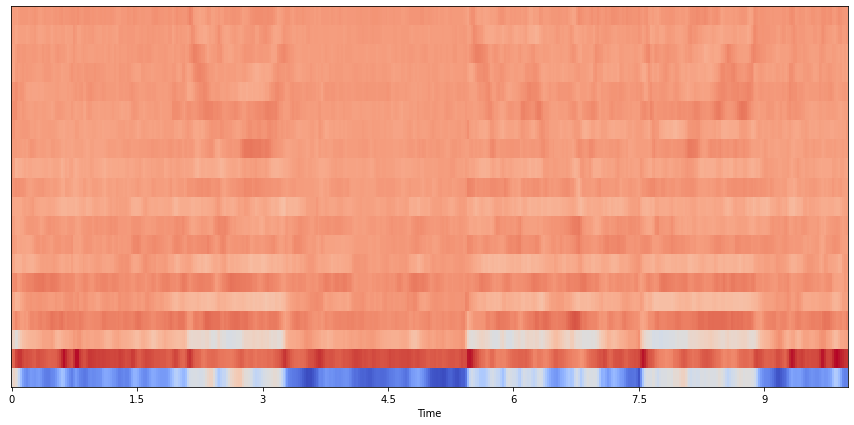

In [41]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
path = r'C:\Users\hpmsi\Downloads\output-20220411T164542Z-001\spec'
#globali = 1
def features_extractor(file,i):
    
    x, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    fig = plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #z = i
    #i = i + 1
    fig.savefig(path+'/'+i+'.png')
    
    return Xdb
    

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]

for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name,row[0])
    extracted_features.append([data,final_class_labels,])

In [ ]:
len(extracted_features)

In [2]:
class train_test_split():
    def __init__(self, file_dir, train_dir, test_dir):
        self.train_ratio = 0.8
        self.image_list = []
        self.origin_file_url = file_dir
        self.train_file_url = train_dir
        self.test_file_url = test_dir
        self.image_detail = []
        self.debug = False

    def __call__(self, *args, **kwargs):
        folder_list = os.listdir(self.origin_file_url)  

        if self.debug:
            print(folder_list)

        for folder in folder_list:

            # get the images in the sub-folder
            self.image_list = os.listdir(os.path.join(self.origin_file_url, str(folder)))

            train_sample, test_sample = self.split_dataset()

            # statistic the information of the images
            image_dict = {"image_category": str(folder), "train_num": len(train_sample), "test_num": len(test_sample)}
            self.image_detail.append(image_dict)



            src = os.path.join(self.origin_file_url, str(folder))
            dst = os.path.join(self.train_file_url, str(folder))

            self.copy_file(src, dst, train_sample)

            dst = os.path.join(self.test_file_url, str(folder))

            self.copy_file(src, dst, test_sample)

            print("{} category split finished!\n".format(str(folder)))

        print(self.image_detail)


    def copy_file(self, src, dst, samples):


        for item in samples:

            src_new = os.path.join(src, str(item))
            dst_new = os.path.join(dst, str(item))
            shutil.copy(src = src_new, dst = dst_new)



    def split_dataset(self):

        image_num = len(self.image_list)
        train_num = int(image_num * self.train_ratio)
        test_num = image_num - train_num

        train_sample = random.sample(self.image_list, train_num)
        test_sample = list(set(self.image_list) - set(train_sample))
        # write the information into dict, then put it into a list

        return train_sample, test_sample

In [3]:
b = os.getcwd()
list2 = ['crying',
         'screaming',
         'shouting'
        ]
os.mkdir(b+'\\Data')
os.mkdir(b+'\\Data\\train')
os.mkdir(b+'\\Data\\test')
for i in list2:
    os.mkdir(b+'\\Data\\train'+"\\"+i)
    os.mkdir(b+'\\Data\\test'+"\\"+i)

In [4]:
import shutil

In [5]:
import random
data_split = train_test_split("spec",
                                  "Data\\train",
                                  "Data\\test")
data_split()

crying category split finished!

screaming category split finished!

shouting category split finished!

[{'image_category': 'crying', 'train_num': 165, 'test_num': 42}, {'image_category': 'screaming', 'train_num': 165, 'test_num': 42}, {'image_category': 'shouting', 'train_num': 165, 'test_num': 42}]


In [6]:
data_dir = 'Data'
train_dir = data_dir +'\\train'
test_dir = data_dir +'\\test'

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision
import os

In [10]:
data_transforms = {
'train':transforms.Compose(
[
 transforms.RandomVerticalFlip(p=0.5),
 transforms.RandomRotation(15),
 #transforms.Grayscale(num_output_channels=1), #(the original picture is gray, but after loaded the data they become RGB(3 Chanels,gray acc is 55.4% )
 transforms.ToTensor(),
 transforms.Resize((32,32))]),
'test':transforms.Compose(
[#transforms.Grayscale(num_output_channels=1),
 transforms.ToTensor(),
 transforms.Resize((32,32))])
}

image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir,x),data_transforms[x]) for x in['train','test']}
dataloaders = {x:DataLoader(image_datasets[x],batch_size = 8,shuffle=True)for x in ['train','test']}

In [11]:
class_ids = image_datasets['train'].classes
print('class_ids:\n',class_ids)
print('num:',len(class_ids))

class_ids:
 ['crying', 'screaming', 'shouting']
num: 3


In [12]:
image_datasets['train'].class_to_idx

{'crying': 0, 'screaming': 1, 'shouting': 2}

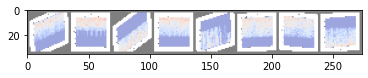

In [13]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(dataloaders['train'])
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [14]:
trainloader = dataloaders['train']
testloader = dataloaders['test']

In [15]:
import torch.nn as nn

__all__ = ["resnet20", "resnet32", "resnet44", "resnet56", "resnet110", "resnet1202"]


def conv3x3(in_planes, out_planes, stride=1):
    "3x3 convolution with padding"
    return nn.Conv2d(
        in_planes, out_planes, kernel_size=3, stride=stride, padding=1, bias=False
    )


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv_1 = conv3x3(inplanes, planes, stride)
        self.bn_1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv_2 = conv3x3(planes, planes)
        self.bn_2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv_1(x)
        out = self.bn_1(out)
        out = self.relu(out)

        out = self.conv_2(out)
        out = self.bn_2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv_1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn_1 = nn.BatchNorm2d(planes)
        self.conv_2 = nn.Conv2d(
            planes, planes, kernel_size=3, stride=stride, padding=1, bias=False
        )
        self.bn_2 = nn.BatchNorm2d(planes)
        self.conv_3 = nn.Conv2d(planes, planes * 4, kernel_size=1, bias=False)
        self.bn_3 = nn.BatchNorm2d(planes * 4)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv_1(x)
        out = self.bn_1(out)
        out = self.relu(out)

        out = self.conv_2(out)
        out = self.bn_2(out)
        out = self.relu(out)

        out = self.conv_3(out)
        out = self.bn_3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):
    def __init__(self, depth, num_classes, block_name="BasicBlock"):
        super(ResNet, self).__init__()
        # Model type specifies number of layers for CIFAR-10 model
        if block_name == "BasicBlock":
            assert (
                depth - 2
            ) % 6 == 0, "depth should be 6n+2, e.g. 20, 32, 44, 56, 110, 1202"
            n = (depth - 2) // 6
            block = BasicBlock
        elif block_name == "Bottleneck":
            assert (
                depth - 2
            ) % 9 == 0, "depth should be 9n+2, e.g. 20, 29, 47, 56, 110, 1199"
            n = (depth - 2) // 9
            block = Bottleneck
        else:
            raise ValueError("block_name shoule be Basicblock or Bottleneck")

        self.inplanes = 16
        self.conv_1 = nn.Conv2d(3, 16, kernel_size=3, padding=1, bias=False)
        self.bn_1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.stage_1 = self._make_layer(block, 16, n)
        self.stage_2 = self._make_layer(block, 32, n, stride=2)
        self.stage_3 = self._make_layer(block, 64, n, stride=2)
        self.avgpool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                # nn.init.xavier_normal(m.weight.data)
                nn.init.kaiming_normal_(m.weight.data)
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(
                    self.inplanes,
                    planes * block.expansion,
                    kernel_size=1,
                    stride=stride,
                    bias=False,
                ),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv_1(x)
        x = self.bn_1(x)
        x = self.relu(x)  # 32x32

        x = self.stage_1(x)  # 32x32
        x = self.stage_2(x)  # 16x16
        x = self.stage_3(x)  # 8x8

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x


def resnet20(num_classes):
    return ResNet(depth=20, num_classes=num_classes)


def resnet32(num_classes):
    return ResNet(depth=32, num_classes=num_classes)


def resnet44(num_classes):
    return ResNet(depth=44, num_classes=num_classes)


def resnet56(num_classes):
    return ResNet(depth=56, num_classes=num_classes)


def resnet110(num_classes):
    return ResNet(depth=110, num_classes=num_classes)


def resnet1202(num_classes):
    return ResNet(depth=1202, num_classes=num_classes)


In [16]:
classes = ('crying',
           'screaming',
           'shouting'
 )   


In [17]:
def train(model, train, test, num_epochs=5, learning_rate=1e-5):
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for img, labels in train:
            optimizer.zero_grad()
            pred = model(img)
            loss = criterion(pred, labels)
            loss.backward()
            optimizer.step()
        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, trainloader))
        valid_acc.append(get_accuracy(model, testloader))
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
              epoch+1, loss, train_acc[-1], valid_acc[-1]))
    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

In [18]:
def showAccuracy(model):
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1

        

    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [21]:
def get_accuracy(model, data_loader):
    correct, total = 0, 0
    for imgs, labels in data_loader:
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total


In [19]:
res = resnet32(3)

Epoch 1; Loss 0.232117; Train Acc 0.943434; Val Acc 0.555556
Epoch 2; Loss 0.126354; Train Acc 0.951515; Val Acc 0.539683
Epoch 3; Loss 0.020555; Train Acc 0.931313; Val Acc 0.547619
Epoch 4; Loss 0.309964; Train Acc 0.937374; Val Acc 0.523810
Epoch 5; Loss 0.058264; Train Acc 0.947475; Val Acc 0.547619
Epoch 6; Loss 0.010230; Train Acc 0.959596; Val Acc 0.523810
Epoch 7; Loss 0.043672; Train Acc 0.955556; Val Acc 0.523810
Epoch 8; Loss 0.234555; Train Acc 0.945455; Val Acc 0.579365
Epoch 9; Loss 0.100723; Train Acc 0.957576; Val Acc 0.539683
Epoch 10; Loss 0.254658; Train Acc 0.957576; Val Acc 0.507937
Epoch 11; Loss 0.041560; Train Acc 0.955556; Val Acc 0.587302
Epoch 12; Loss 0.414626; Train Acc 0.963636; Val Acc 0.563492
Epoch 13; Loss 0.018254; Train Acc 0.955556; Val Acc 0.587302
Epoch 14; Loss 0.060977; Train Acc 0.959596; Val Acc 0.539683
Epoch 15; Loss 0.144310; Train Acc 0.973737; Val Acc 0.531746
Epoch 16; Loss 0.137621; Train Acc 0.937374; Val Acc 0.563492
Epoch 17; Loss 0.

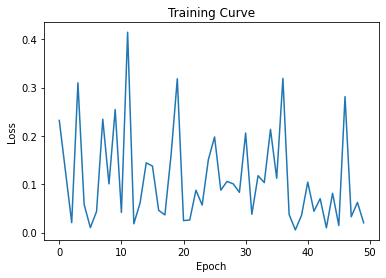

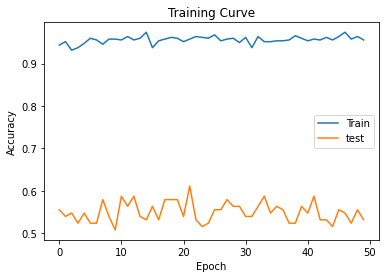

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(res.parameters(), lr=1e-5) 
train(res,trainloader,testloader,50)

In [24]:
torch.save(res.state_dict(), "res32.pth")

In [32]:
net.load_state_dict(torch.load('net.pth'))
res.load_state_dict(torch.load('res32.pth'))

NameError: name 'net' is not defined

In [26]:
showAccuracy(res)
get_accuracy(res,testloader)

Accuracy for class: crying is 47.6 %
Accuracy for class: screaming is 42.9 %
Accuracy for class: shouting is 73.8 %


0.5634920634920635

In [30]:
import seaborn as sn

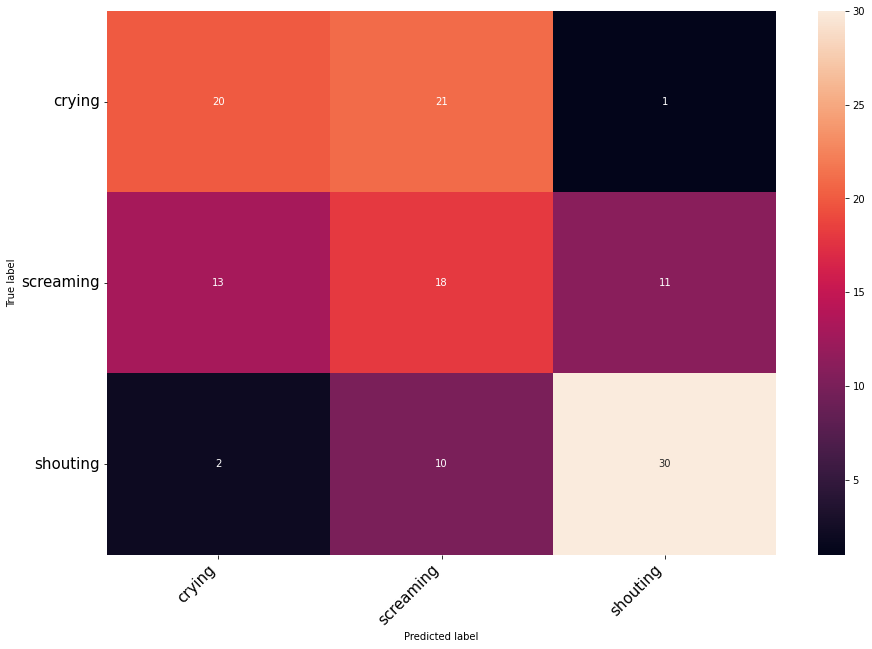

In [31]:
list_name = ['crying',
            'screaming',
            'shouting']


DEVICE = 'cpu'
nb_classes = 3
confusion_matrix = np.zeros((nb_classes, nb_classes))
with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(DEVICE)
        classes = classes.to(DEVICE)
        outputs = res(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plt.figure(figsize=(15,10))

class_names = list_name
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sn.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('res32.png')